In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#df = df.drop(['CustomerID','Gender'], axis=1)
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [4]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [6]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
df.shape

(200, 3)

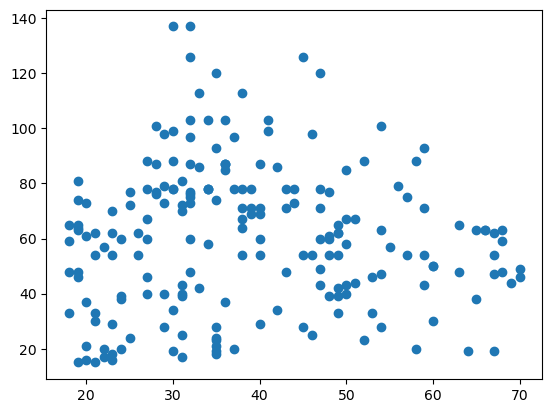

In [8]:
plt.scatter(df.age, df.income)

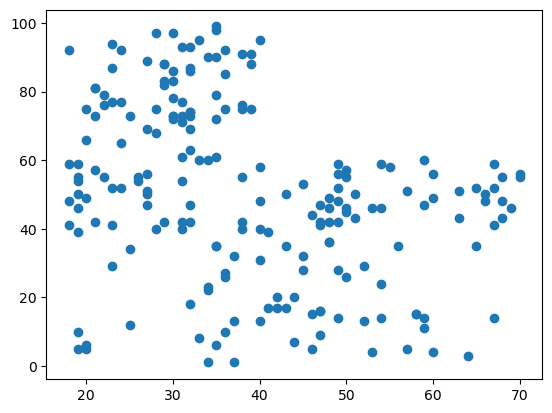

In [9]:
plt.scatter(df.age, df.score)

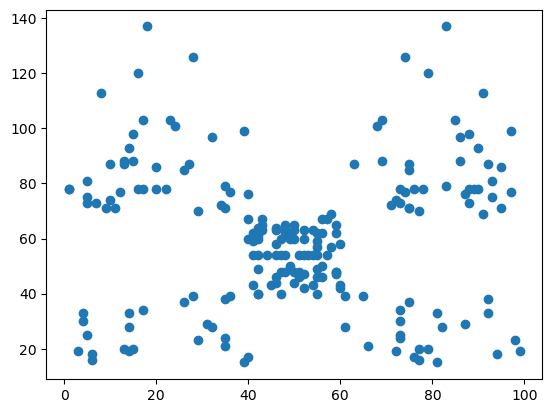

In [10]:
plt.scatter(df.score, df.income)

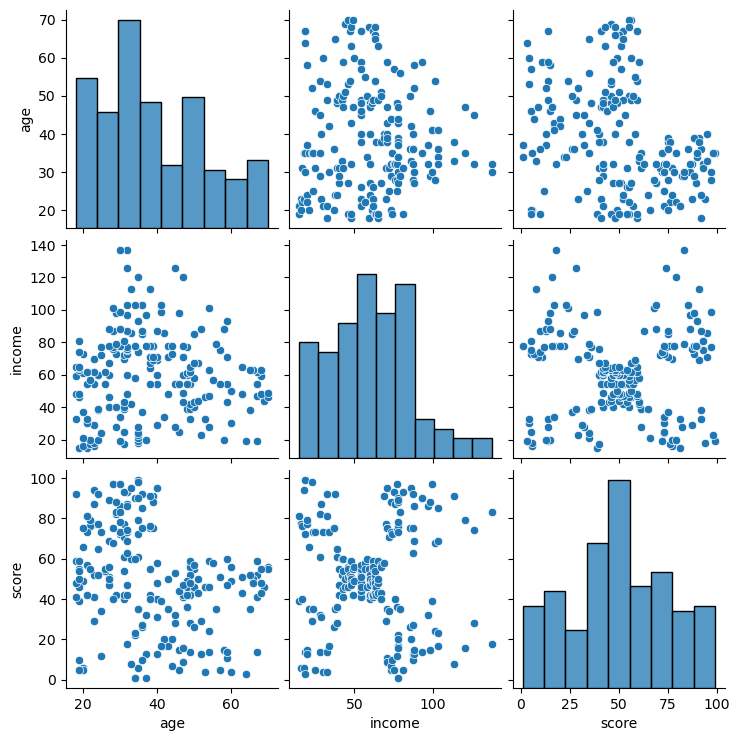

In [11]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

Text(0.5, 1.0, 'income and score plot of cutomres')

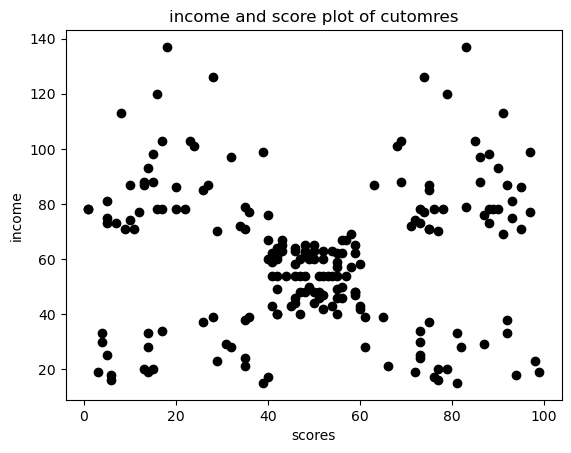

In [12]:
plt.scatter(df.score, df.income, color='black')
plt.xlabel('scores')
plt.ylabel('income')
plt.title('income and score plot of cutomres')

In [13]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans() #n_clusters=8

In [26]:
# Force compatible versions to fix OpenBLAS + threadpoolctl error
!pip uninstall -y scikit-learn numpy threadpoolctl
!pip install numpy==1.24.4 scikit-learn==1.3.2 threadpoolctl==3.1.0

import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"


import pandas as pd
from sklearn.cluster import KMeans

# Sample data
data = {
    'score': [80, 95, 50, 60, 77],
    'income': [30000, 55000, 20000, 25000, 35000]
}
df = pd.DataFrame(data)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df[['score', 'income']])

# Output cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Optional: assign cluster labels to the data
df['Cluster'] = kmeans.labels_
df

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: threadpoolctl 3.1.0
Uninstalling threadpoolctl-3.1.0:
  Successfully uninstalled threadpoolctl-3.1.0


  Using cached numpy-1.24.4-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl (9.3 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Cluster Centers:
 [[   95.   55000.  ]
 [   66.75 27500.  ]]


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.4 which is incompatible.


,score,income,Cluster
0,80,30000,1
1,95,55000,0
2,50,20000,1
3,60,25000,1
4,77,35000,1


In [27]:
df['Group1'] = km.predict(df[['score', 'income']])

In [28]:
km.cluster_centers_ 

array([[   95.  , 55000.  ],
       [   66.75, 27500.  ]])

In [29]:
df

,score,income,Cluster,Group1
0,80,30000,1,1
1,95,55000,0,0
2,50,20000,1,1
3,60,25000,1,1
4,77,35000,1,1


In [30]:
df0 = df[df.Group1 == 0]
df1 = df[df.Group1 == 1]
df2 = df[df.Group1 == 2]
df3 = df[df.Group1 == 3]
df4 = df[df.Group1 == 4]
df5 = df[df.Group1 == 5]
df6 = df[df.Group1 == 6]
df7 = df[df.Group1 == 7]

In [31]:
df0.head()

,score,income,Cluster,Group1
1,95,55000,0,0


In [32]:
df2.head()

,score,income,Cluster,Group1


In [33]:
centroid = km.cluster_centers_ 
centroid

array([[   95.  , 55000.  ],
       [   66.75, 27500.  ]])

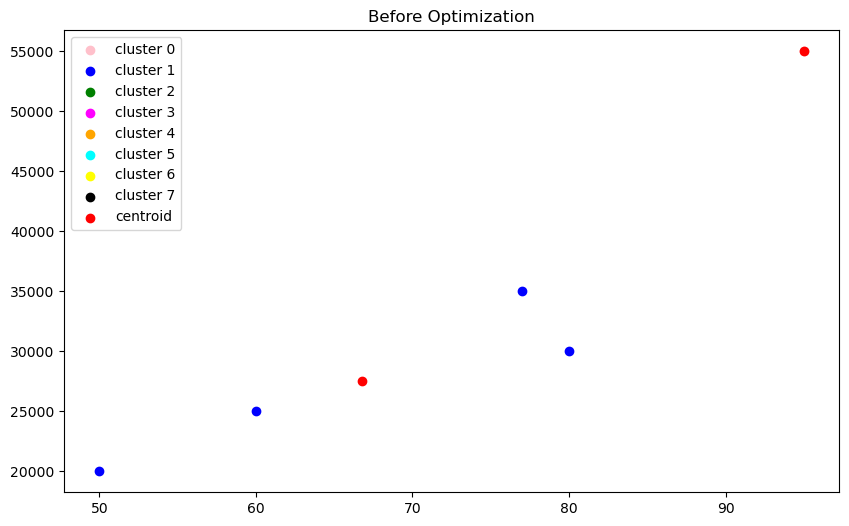

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='cluster 5')
plt.scatter(df6.score, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='cluster 7')

plt.scatter(centroid[:, 0], centroid[:,1], color='red', label='centroid')

plt.title('Before Optimization')

plt.legend()

# Optimizing KMENAS

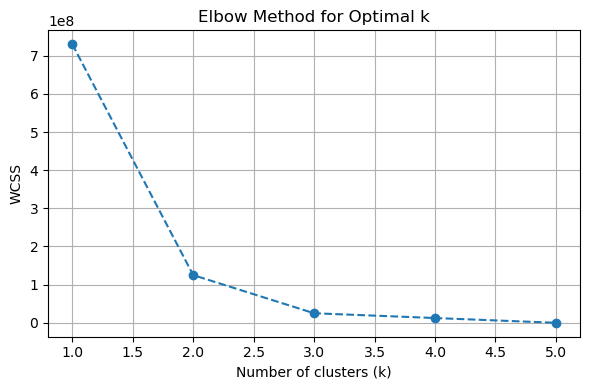

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Sample DataFrame
data = {
    'score': [80, 95, 50, 60, 77],
    'income': [30000, 55000, 20000, 25000, 35000]
}
df = pd.DataFrame(data)

# Step 2: Apply Elbow Method safely (max clusters = number of samples)
wcss = []
max_clusters = len(df)  # can't have more clusters than samples
for k in range(1, max_clusters + 1):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_)

# Step 3: Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
wcss

[730001245.1999999, 125000606.75, 25000054.5, 12500050.0, 0.0]

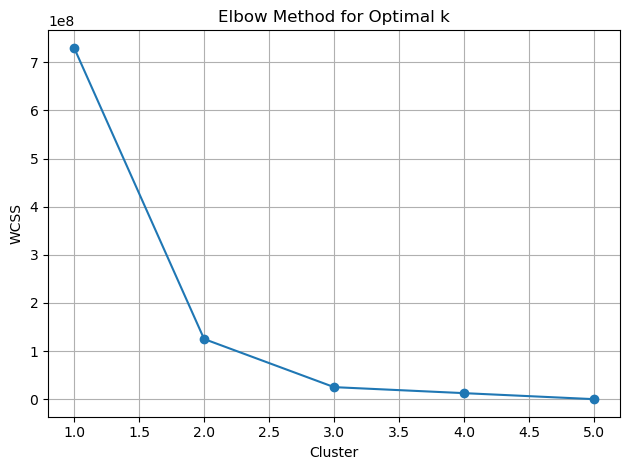

In [39]:
import matplotlib.pyplot as plt

# Plot only up to the number of available WCSS values
plt.plot(range(1, len(wcss) + 1), wcss, marker='o')  # Correct length
plt.ylabel('WCSS')
plt.xlabel('Cluster')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

Optimal number of clusters (k): 2


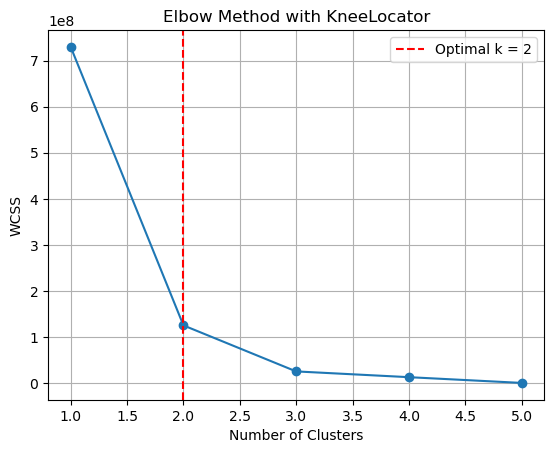

In [42]:
!pip install kneed
# Step 1: Import KneeLocator
from kneed import KneeLocator

# Step 2: Make sure `cluster` and `wcss` are already defined
# Example (ensure number of clusters ≤ number of samples)
wcss = []
cluster = range(1, len(df) + 1)  # from 1 to number of data points
for k in cluster:
    km2 = KMeans(n_clusters=k, random_state=42)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

# Step 3: Apply KneeLocator
kn = KneeLocator(cluster, wcss, direction='decreasing', curve='convex')
print("Optimal number of clusters (k):", kn.knee)

# Step 4: Plot WCSS and knee point
import matplotlib.pyplot as plt
plt.plot(cluster, wcss, marker='o')
plt.axvline(kn.knee, color='red', linestyle='--', label=f'Optimal k = {kn.knee}')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method with KneeLocator')
plt.legend()
plt.grid(True)
plt.show()

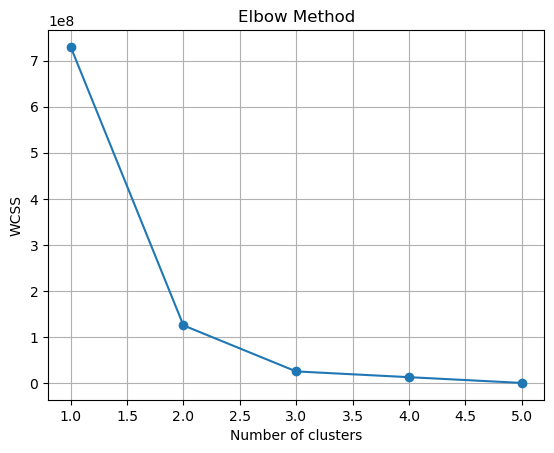

Optimal number of clusters: 2


In [43]:
from kneed import KneeLocator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator  # <- Import here!

# Sample DataFrame
data = {
    'score': [80, 95, 50, 60, 77],
    'income': [30000, 55000, 20000, 25000, 35000]
}
df = pd.DataFrame(data)

# Elbow Method calculation
wcss = []
cluster_range = range(1, len(df) + 1)  # 1 to 5 clusters
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Use KneeLocator to find the elbow point
kn = KneeLocator(cluster_range, wcss, curve='convex', direction='decreasing')
print("Optimal number of clusters:", kn.elbow)

In [ ]:
kn.plot_knee()

In [ ]:
kn.knee

# After Optimizing

In [ ]:
km = KMeans(n_clusters=5) #i know 5 is optimal
df['Group2'] = km.fit_predict(df[['score', 'income']]) #fit_predict()

In [ ]:
df.head()

In [ ]:
cen = km.cluster_centers_
cen

In [ ]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid')
plt.title('After Optimization')

plt.legend()